We want to minimize the following expectation
$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$
We need to compute the gradient w.r.t. $\phi$. We apply the likelihood ratio trick:

\begin{eqnarray}
\nabla_\phi \mathbb{E}_{q_\phi (x)}[f(x)] & = & \nabla_\phi \sum_x q_\phi (x) f(x) \\
& = & \sum_x \nabla_\phi q_\phi (x) f(x) \\
& = & \sum_x q_\phi (x) \frac{\nabla_\phi q_\phi (x)}{q_\phi (x)} f(x)\\
& = & \mathbb{E}_{q_\phi (x)} \nabla_\phi \log q_\phi(x) f(x) \\
& = & \frac{1}{K} \sum_{i = 1}^K \nabla_\phi \log q_\phi (x^{(i)}) f(x^{(i)})
\end{eqnarray}
where $x^{(i)} \sim q_\phi (x)$.

This Likelihood Ratio Gradient has high variance, especially in higher dimensional spaces.
An example in 2D:

Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{\mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}


Apply the formula

\begin{eqnarray}
\nabla_\mu \mathcal{L} & = & \mathbb{E}\left[\nabla_\mu \log \left(\exp\left(-\frac{1}{2} (x - \mu)^\top I (x-\mu) \right)\right) f(x)\right] \\
& = & \mathbb{E} \left[\left\lvert\left\lvert x - \left[
\begin{matrix} 5 \\ 5 \end{matrix}
\right] \right\rvert\right\rvert_2^2 \nabla_\mu -\frac{1}{2} (x - \mu)^\top (x-\mu)  \right] \\
& = & \mathbb{E} \left[  \left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 (x - \mu) \right]
\end{eqnarray}


In [26]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])
n=40

x = np.random.multivariate_normal(mean=mu, cov=I, size=(n,))

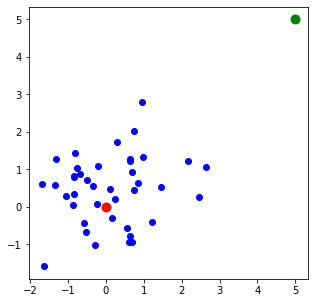

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c='b')

ax.scatter(mu[0], mu[1], c='r', s=80)
ax.scatter(target[0], target[1], c='g', s=80)

In [28]:
def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def lrg(z, mu, target):
    norm = np.linalg.norm(z - target, axis=1) ** 2
    # print('norm', norm)
    # print('z - mu', z - mu)
    grad = (norm[:, np.newaxis] * (z - mu)).mean(axis=0)

    # print('grad', grad)

    return grad

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):
        z = np.random.multivariate_normal(mean=mu, cov=I, size=n_train)
        lrgi = lrg(z, mu, target)
        mu = mu - lr * lrgi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

When `n_train = 1`, the training is very unstable. It diverges when `lr = 0.1` and converges slowly when `lr = 0.01`.

In [29]:
## unstable learning rate
print('Unstable------------')
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100)
print()

## stable learning rate
print('Stable-----------')
train(mu, target, loss, lr=0.01, n_train=1, n_test=100, n_iter=100)

Unstable------------
0 85.60388098884886
1 270.88595022490983
2 455.744571465925
3 22003.420852182815
4 210132.38191125772
5 514764059.8337607
6 4918882319709725.0
7 3.660061652254538e+29
8 1.225791022120252e+57
9 1.225791022120252e+57
10 1.225791022120252e+57
11 1.225791022120252e+57
12 1.225791022120252e+57
13 1.225791022120252e+57
14 1.225791022120252e+57
15 1.225791022120252e+57
16 1.225791022120252e+57
17 1.225791022120252e+57
18 1.225791022120252e+57
19 1.225791022120252e+57
20 1.225791022120252e+57
21 1.225791022120252e+57
22 1.225791022120252e+57
23 1.225791022120252e+57
24 1.225791022120252e+57
25 1.225791022120252e+57
26 1.225791022120252e+57
27 1.225791022120252e+57
28 1.225791022120252e+57
29 1.225791022120252e+57
30 1.225791022120252e+57
31 1.225791022120252e+57
32 1.225791022120252e+57
33 1.225791022120252e+57
34 1.225791022120252e+57
35 1.225791022120252e+57
36 1.225791022120252e+57
37 1.225791022120252e+57
38 1.225791022120252e+57
39 1.225791022120252e+57
40 1.225791022

Increasing `n_train` improve the stability of the training. Now `lr = 0.1` and greater still works well.
We can learn much faster due to larger learning rate.

0 32.14310227660487
1 21.49098162244708
2 18.12426985774358
3 10.15676998625532
4 7.504370520073087
5 5.152362971876292
6 3.9027664076132385
7 2.5210225079654958
8 1.9054702163608215
9 1.9903394293712717
10 2.2481315016396577
11 2.1349343342138907
12 2.0746005157600083
13 2.1695136483210096
14 2.063527234671629
15 1.9390903134929756
16 1.641390173888787
17 1.8986806652513795
18 1.9793291778074464
19 1.926889612149897
20 2.6740922818244526
21 1.8957491578485162
22 2.207767600895709
23 1.8492580241807643
24 2.099581450261821
25 2.0665643374515543
26 1.849637120479927
27 1.8098535329911738
28 1.9256313166589623
29 2.1028635167286125
30 2.328751685100192
31 2.4487484433596443
32 2.0353605304528064
33 2.1548778396134605
34 2.2206324062556684
35 2.043548149805557
36 1.8017030121464725
37 2.3718408492020955
38 2.2325416979036343
39 1.8689730895065635
40 1.8314153394570198
41 2.284685539134962
42 1.7505620544902392
43 1.8202266387634218
44 1.8891848144172092
45 1.5171596190393677
46 2.32901895

<ipython-input-28-247436d360eb>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


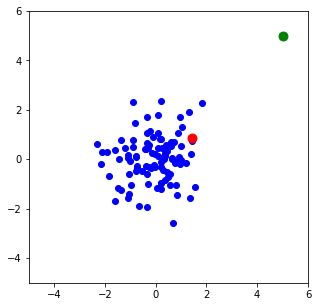

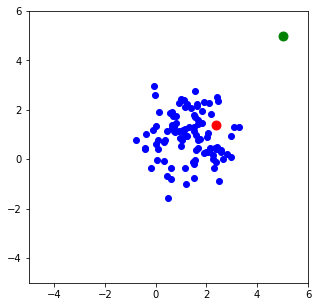

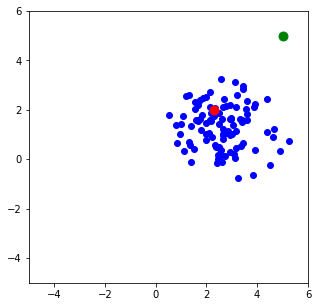

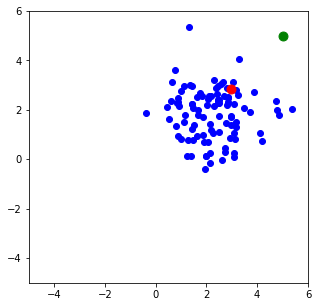

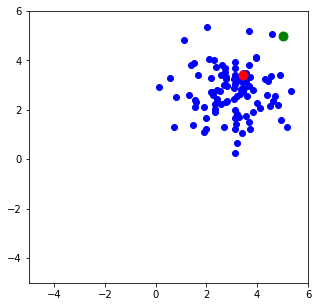

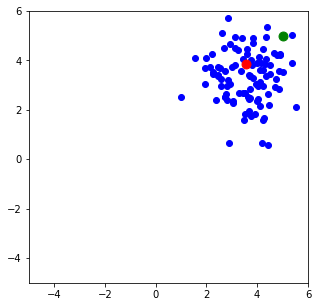

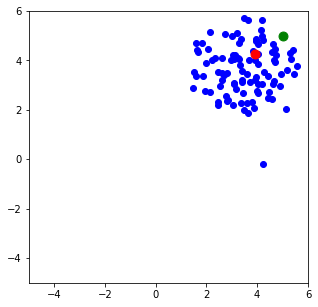

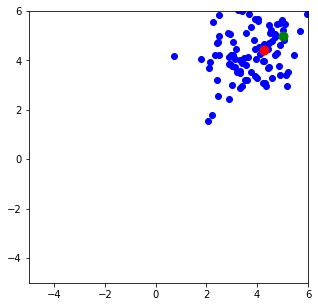

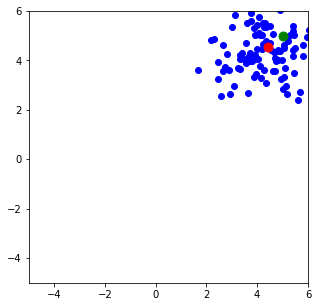

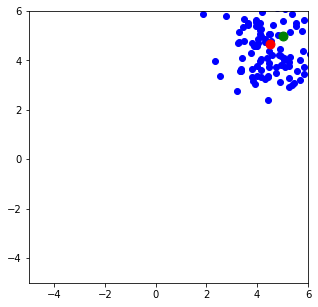

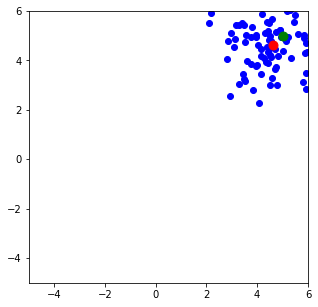

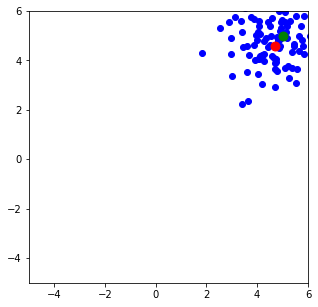

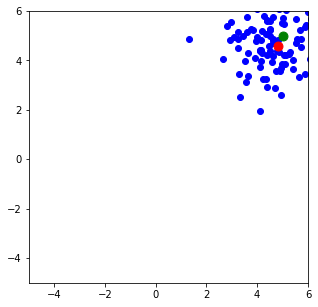

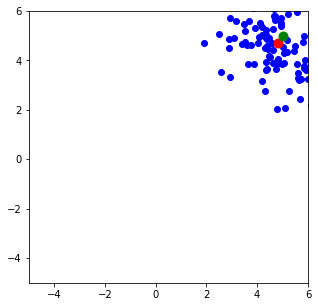

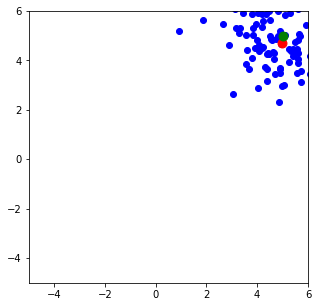

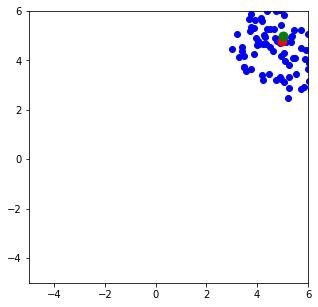

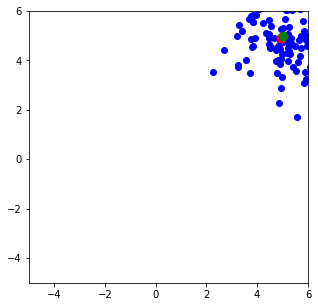

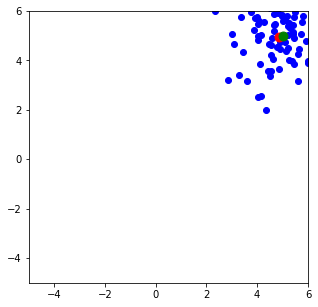

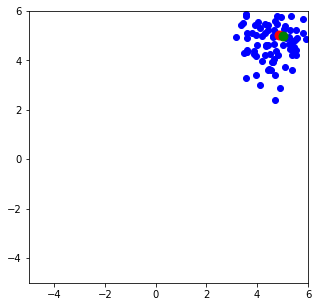

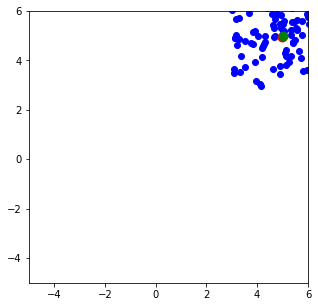

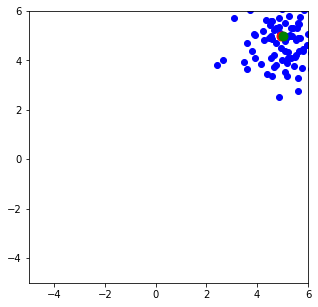

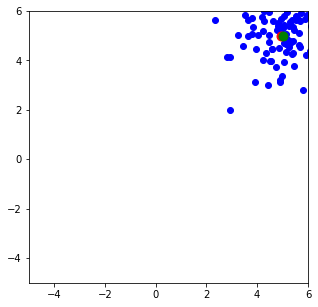

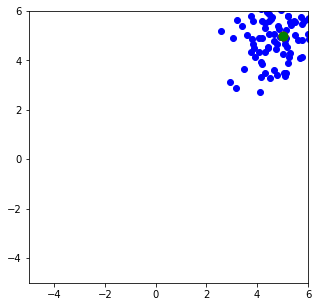

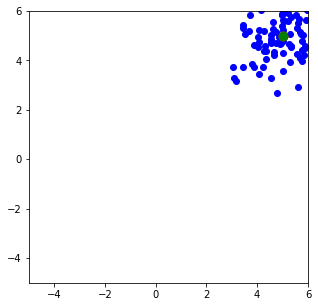

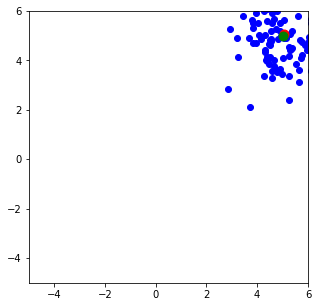

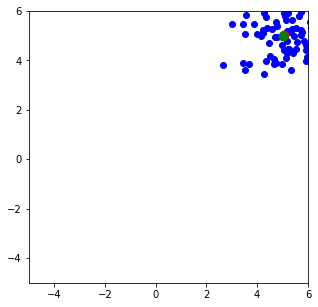

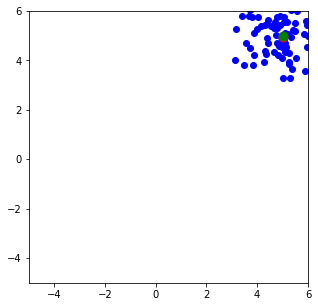

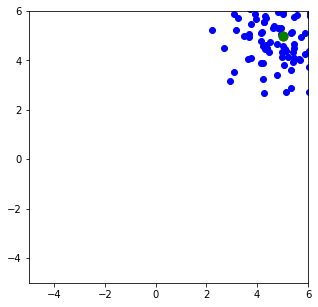

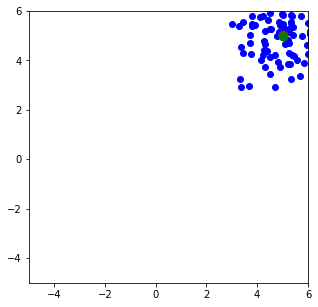

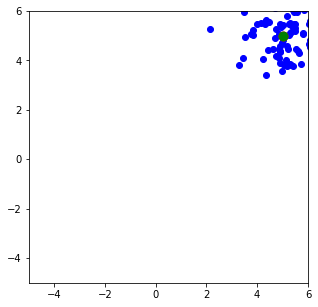

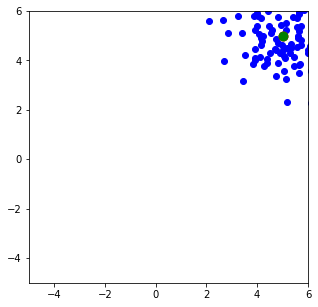

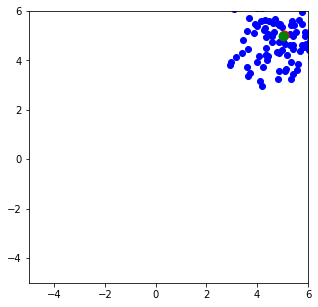

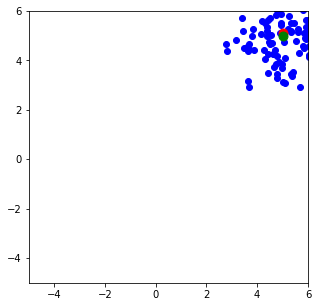

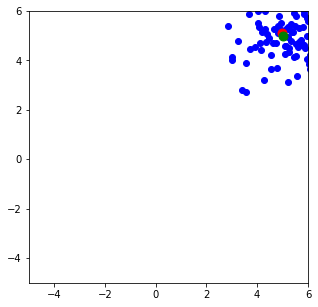

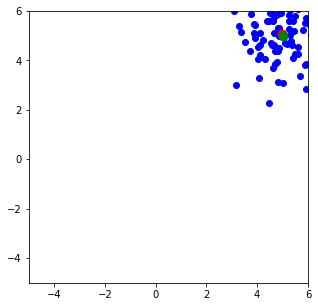

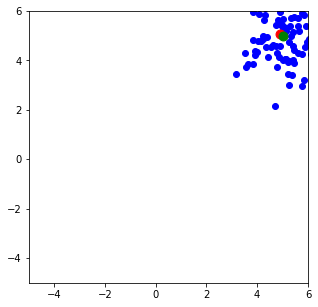

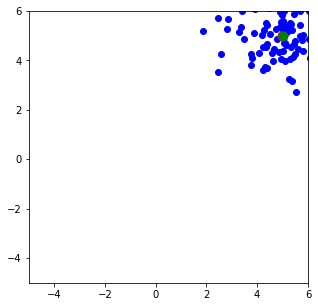

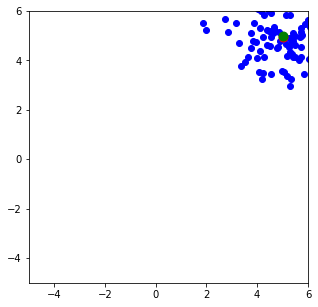

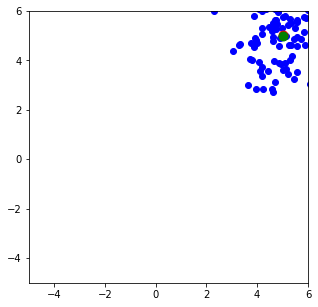

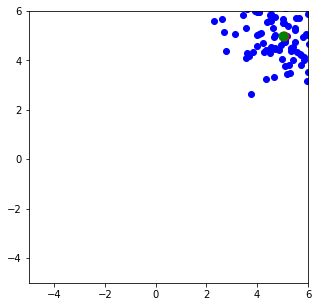

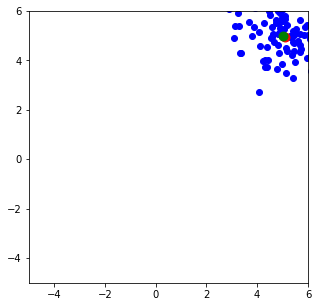

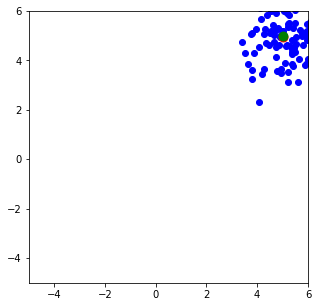

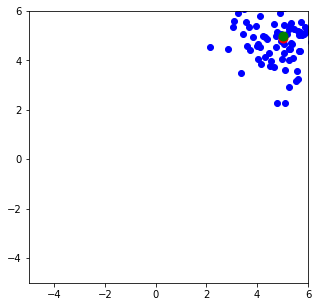

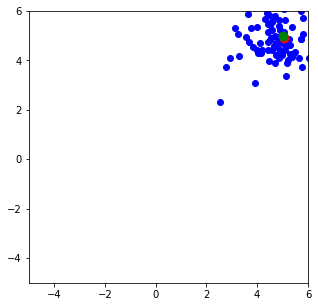

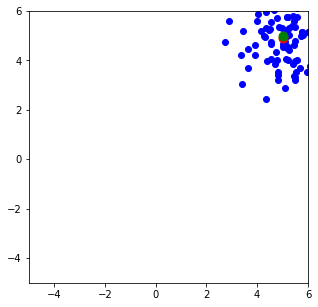

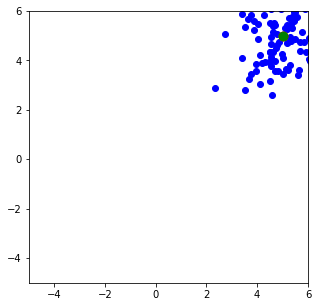

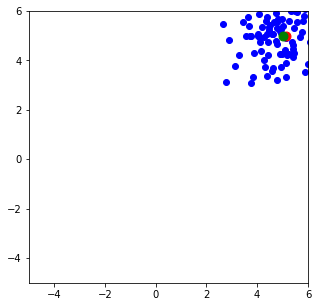

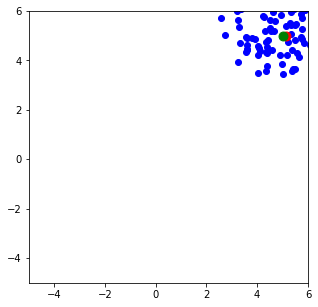

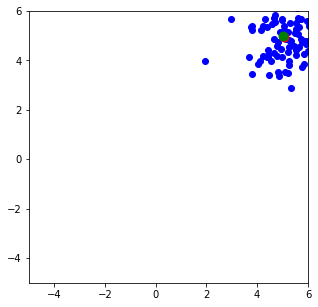

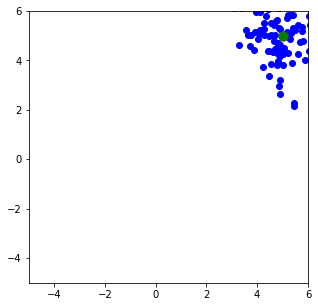

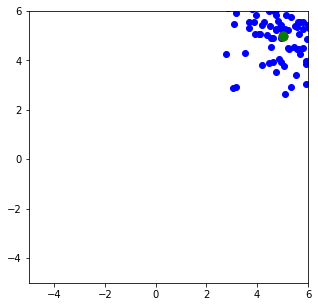

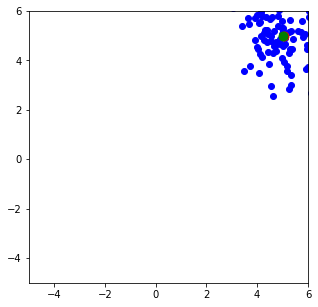

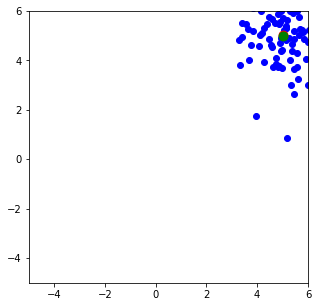

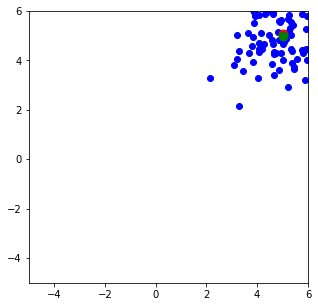

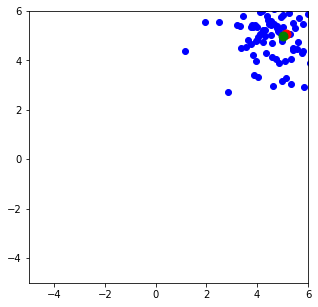

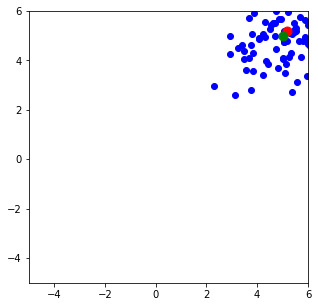

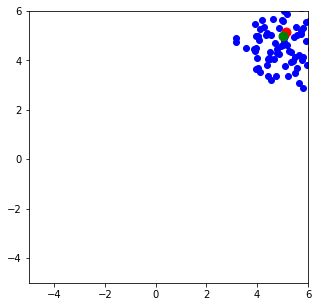

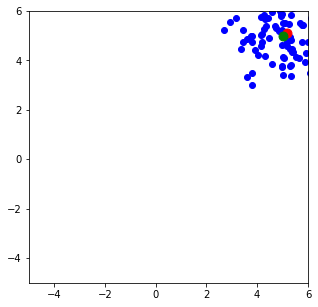

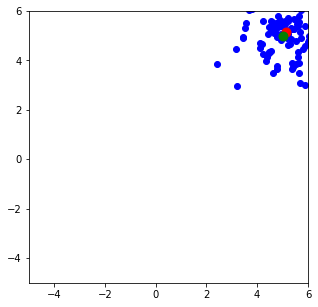

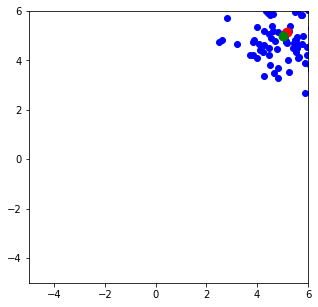

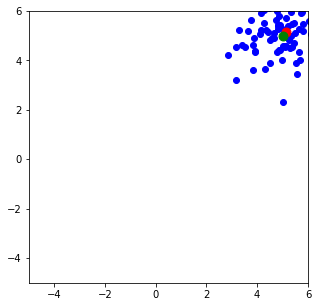

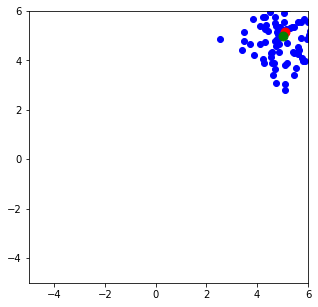

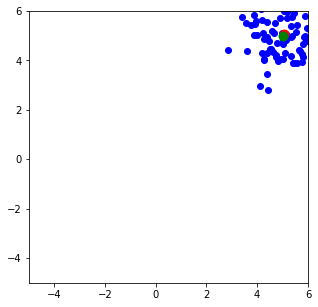

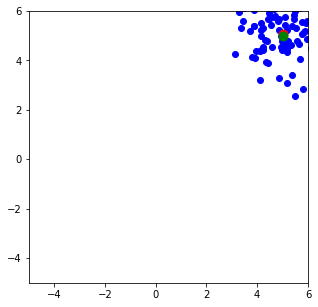

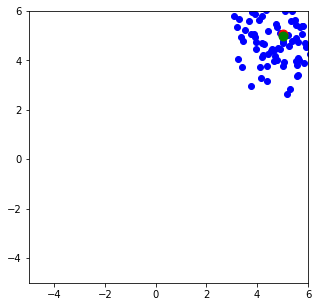

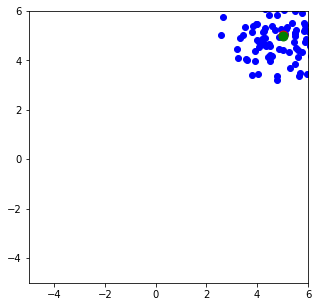

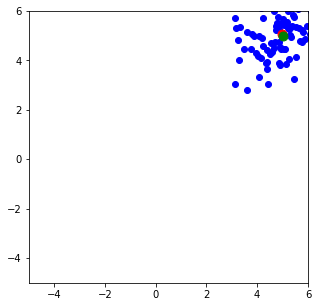

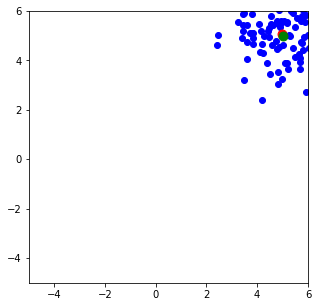

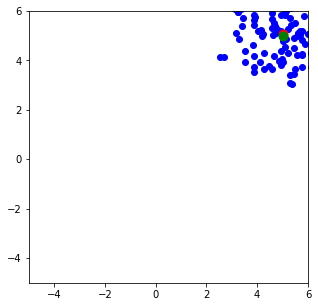

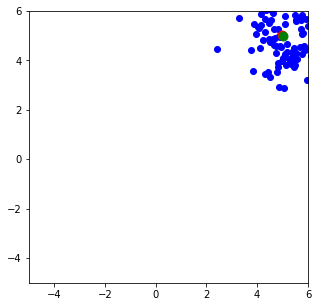

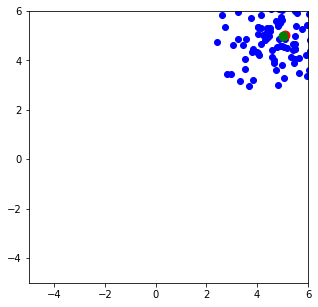

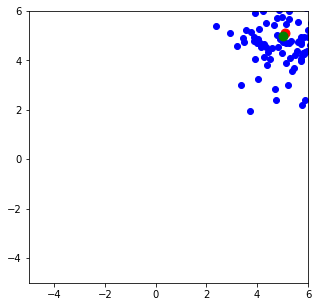

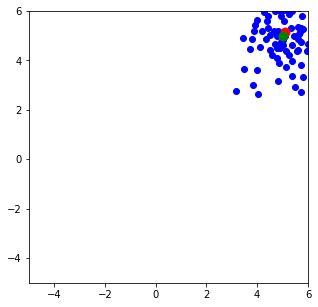

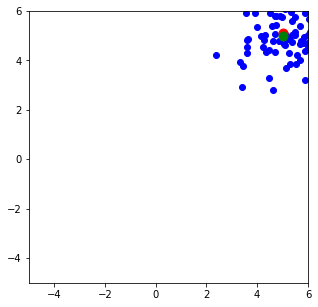

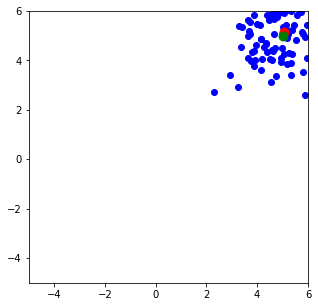

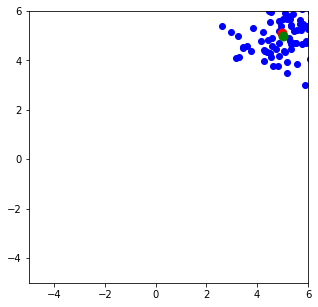

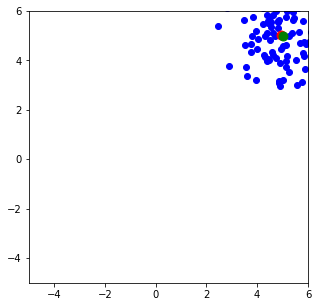

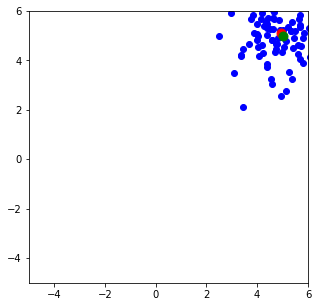

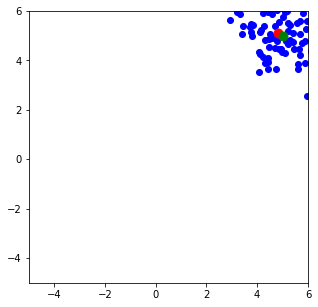

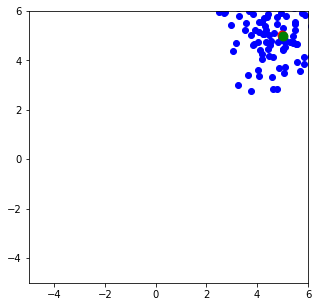

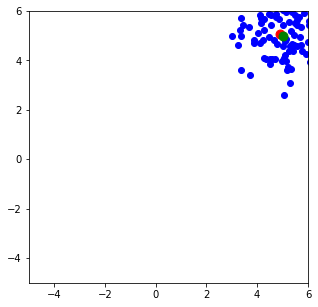

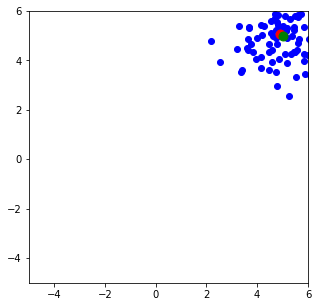

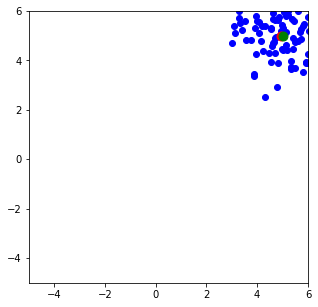

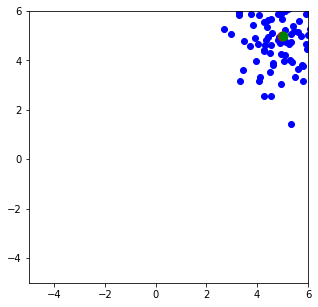

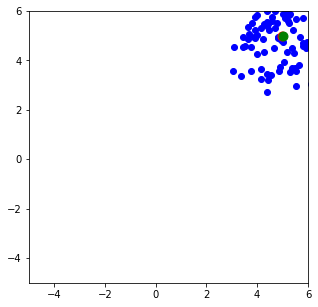

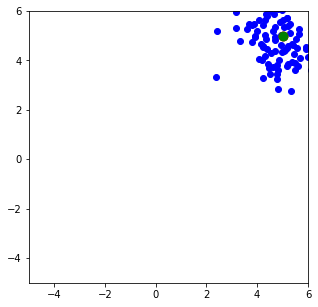

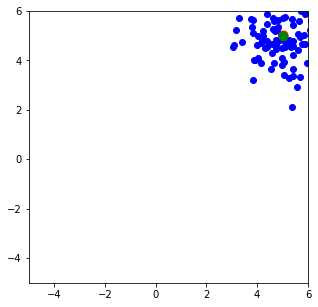

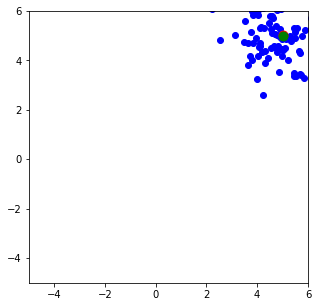

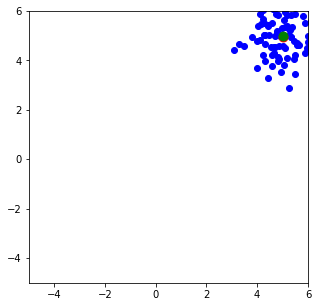

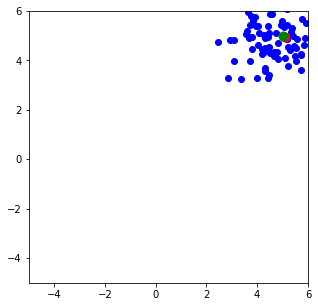

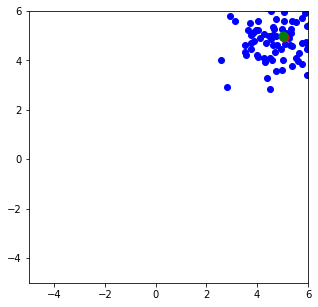

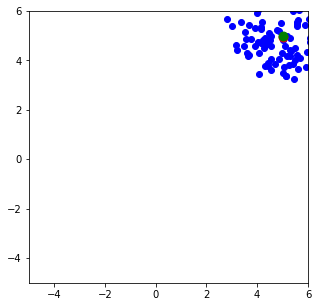

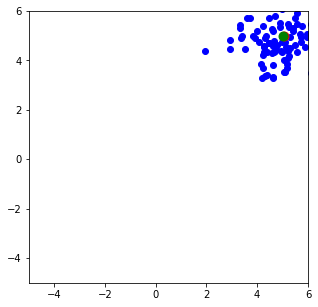

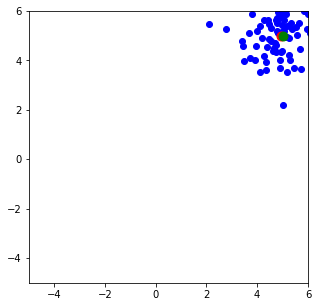

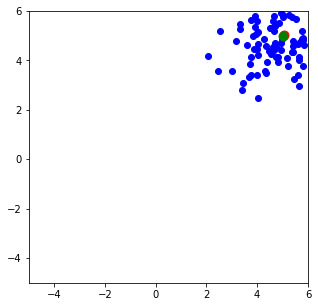

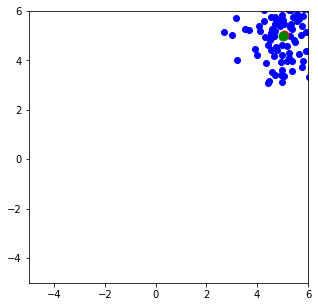

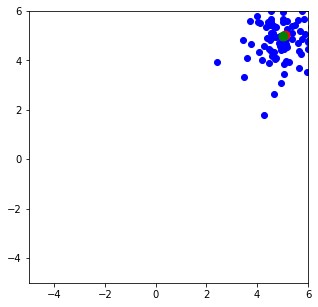

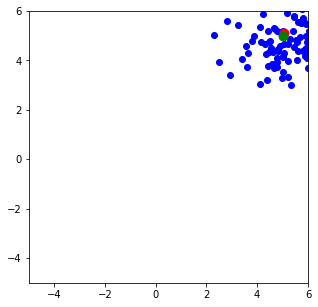

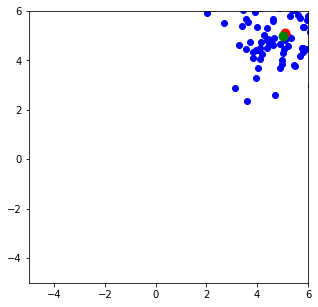

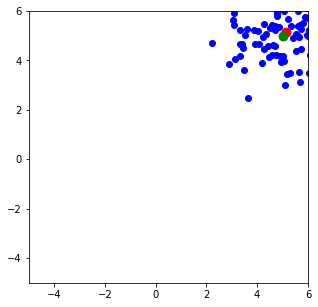

In [30]:
# train(mu, target, loss, lr=0.01, n_train=10, n_test=100, n_iter=100)

train(mu, target, loss, lr=0.1, n_train=100, n_test=100, n_iter=100, viz=True)

